In [1]:
# CNN test. First convolutional network - Quinn Vaughn

In [2]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
# Make matplotlib charts show in the notebook
%matplotlib inline

In [3]:
# Helper functions

# Best and Worst options from an image
def show_min_max(array, i):
  random_image = array[i]
  print(random_image.min(), random_image.max())

# Plots image from array
def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" Digit " + str(labels[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


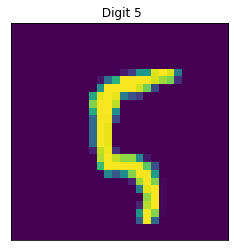

0 255


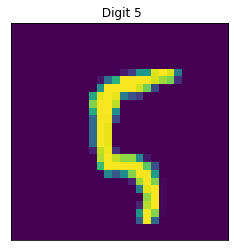

0.0 1.0


In [4]:
# Keep track of image size (28 x 28 px)
img_rows, img_cols = 28,28

# Set output class size
num_classes = 10

# Load the data
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
# Create backup of untouched data
(train_images_backup,train_labels_backup),(test_images_backup,test_labels_backup) = mnist.load_data()

# Log shape of train and test images
print(train_images.shape)
print(test_images.shape)

# Reshape train + test images
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

# Keep track of shape of the object
input_shape = (img_rows, img_cols, 1)

# Plot the 100th char
plot_image(train_images, 100, train_labels)
show_min_max(train_images, 100)

# Convert data to float 32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Divide by 255
train_images /= 255
test_images /= 255

# Graph image and min max values
plot_image(train_images, 100, train_labels)
show_min_max(train_images, 100)

# Utilize one hot encoding to increase detection success
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [5]:
# CNN BLOCK

# Define epochs
epochs = 10

# Both DNN and CNN use sequential, so we are gonna define the model as sequential
model = Sequential()

# Add Conv2D layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=input_shape))

# Add pooling layer (Downscales images)
model.add(MaxPooling2D(pool_size=(2,2), ))

# Add another Conv2D layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Add a dropout layer, drops out 30% of the neurons forcing them to adapt
model.add(Dropout(rate=0.3,))

# Add another Conv2D layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))

In [6]:
# DNN layer

# Flatten data to be readable
model.add(Flatten())

# First layer of DNN, 32 neurons relu.
model.add(Dense(units=32, activation='relu'))

# Output layer
model.add(Dense(10, activation="softmax"))

In [7]:
# Get the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 flatten (Flatten)           (None, 2592)              0         
                                                        

In [8]:
# Compile the model to be trained
model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [9]:
# Train the model
model.fit(train_images, train_labels, batch_size=64, epochs=epochs, validation_data=(test_images, test_labels), shuffle=True)

Epoch 1/10
938/938 [==============================] - 19s 6ms/step - loss: 0.1709 - accuracy: 0.9471 - val_loss: 0.0476 - val_accuracy: 0.9840
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.0363 - val_accuracy: 0.9879
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0355 - accuracy: 0.9894 - val_loss: 0.0401 - val_accuracy: 0.9874
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0282 - accuracy: 0.9916 - val_loss: 0.0297 - val_accuracy: 0.9906
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0234 - accuracy: 0.9931 - val_loss: 0.0281 - val_accuracy: 0.9912
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0202 - accuracy: 0.9941 - val_loss: 0.0272 - val_accuracy: 0.9911
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0174 - accuracy: 0.9950 - val_loss: 0.0302 - val_accuracy: 0.9908
Epoch

In [10]:
# Evaluate the model

# Get the model scores
scores = model.evaluate(test_images, test_labels, verbose=0)

print("Test accuracy: %s"%scores[1])


Test accuracy: 0.993399977684021
